Project Machine Failure

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the train dataset

In [4]:
import pandas as pd
df= pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

check missing values in dataframe

In [6]:
m= df.isna().sum()
m[m>0]

Series([], dtype: int64)

check duplicates in dataframe

In [7]:
df.duplicated().sum()

0

Seperate X and Y (Machine Failure)

Drop stastically insignificant feature -ID,ProductId)


In [8]:
X =df.drop(columns=['Product ID','id','Machine failure'])
Y =df[['Machine failure']]

In [9]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


Seperate cat and con features

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con =list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

Creste a pipeline for feature selection

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [16]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [17]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [18]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Type'])])

In [19]:
X_pre =pre1.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


Find mutual information scores

In [20]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00478046, 0.00216642, 0.01956639, 0.02006537, 0.00709854,
       0.00722439, 0.02473966, 0.01126603, 0.01946007, 0.00139282,
       0.01126849])

In [21]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024740
num__Torque [Nm]                0.020065
num__Rotational speed [rpm]     0.019566
num__OSF                        0.019460
cat__Type                       0.011268
num__PWF                        0.011266
num__TWF                        0.007224
num__Tool wear [min]            0.007099
num__Air temperature [K]        0.004780
num__Process temperature [K]    0.002166
num__RNF                        0.001393
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

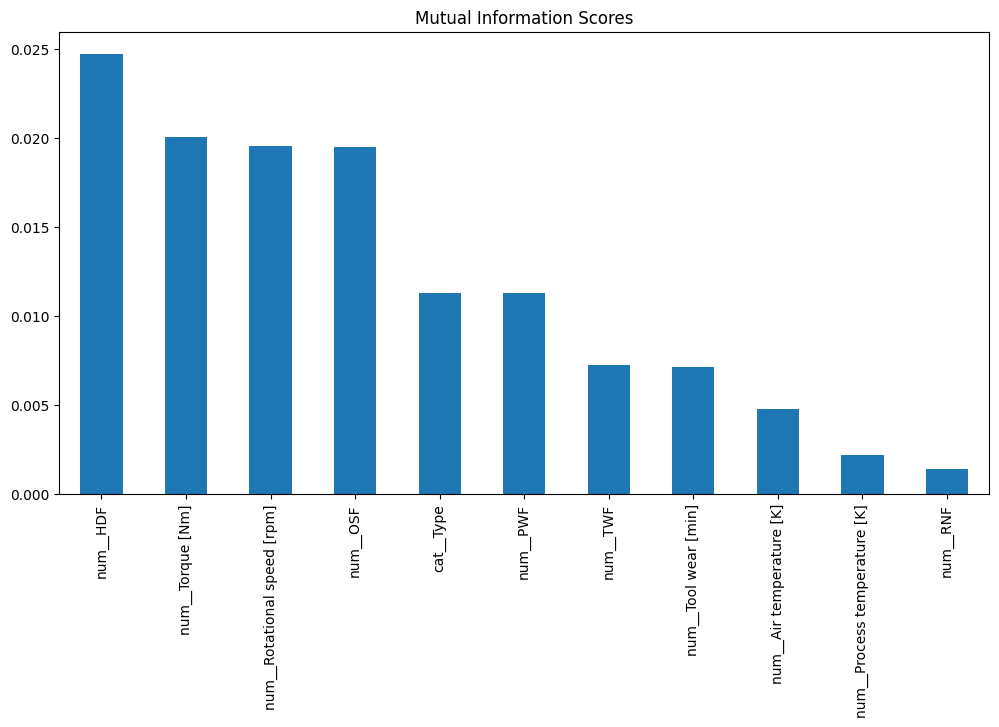

In [22]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

select top 5 feature

In [23]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=5)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__OSF', 'cat__Type'], dtype=object)

Get the orignal column names

In [24]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [25]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [26]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [27]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF', 'Type']

In [28]:
X_imp = X[imp_cols]
X_imp

,Rotational speed [rpm],Torque [Nm],HDF,OSF,Type
0,1596,36.1,0,0,L
1,1759,29.1,0,0,M
2,1805,26.5,0,0,L
3,1524,44.3,0,0,L
4,1641,35.4,0,0,M
...,...,...,...,...,...
136424,1530,37.5,0,0,M
136425,1447,49.1,0,0,H
136426,1524,38.5,0,0,L
136427,1447,46.3,0,0,L


Seperate cat and con for selected columns

In [29]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [30]:
cat_sel

['Type']

In [31]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF']

Create a final preprocessing Pipeline

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])


In [34]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [35]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')


In [36]:
X_sel_pre = pre2.fit_transform(X_imp)
X_sel_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.545416,-0.499711,-0.072021,-0.063038,0.0,1.0,0.0
1,1.720308,-1.323028,-0.072021,-0.063038,0.0,0.0,1.0
2,2.051873,-1.628831,-0.072021,-0.063038,0.0,1.0,0.0
3,0.026445,0.464745,-0.072021,-0.063038,0.0,1.0,0.0
4,0.869773,-0.582043,-0.072021,-0.063038,0.0,0.0,1.0


Apply train test split for X_sel_pre

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state =42)

In [38]:
xtrain.shape

(109143, 7)

In [39]:
xtest.shape

(27286, 7)


Apply AlgoEvaluation

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [41]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [42]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [43]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [106]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.7155
Train F1 Cross Validated : 0.8562
Test F1 : 0.6931




Model name : Decision Tree

Train F1 : 0.9017
Train F1 Cross Validated : 0.8246
Test F1 : 0.6675


Model name : Random Forest

Train F1 : 0.9026
Train F1 Cross Validated : 0.8550
Test F1 : 0.7139


Model name : Gradient Boost

Train F1 : 0.7736
Train F1 Cross Validated : 0.8760
Test F1 : 0.7406




In [45]:
tr

[0.7155012948575658, 0.901686286986955, 0.9027996225228059, 0.7735849056603773]

NameError: name 'best_model' is not defined

In [46]:
ts

[0.6930983847283406,
 0.6618004866180047,
 0.7146596858638744,
 0.7406380027739251]

In [47]:
tr_cv

[0.8562329855957561,
 0.8239423458894093,
 0.8545000805160168,
 0.8755018836357905]

In [48]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier()}

In [49]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost']

In [50]:
results_dct = {'Model_name' :list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [51]:
results_df = pd.DataFrame(results_dct)
results_df


,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.715501,0.693098,0.856233
1,Decision Tree,0.901686,0.661800,0.823942
2,Random Forest,0.902800,0.714660,0.854500
3,Gradient Boost,0.773585,0.740638,0.875502


In [52]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
3,Gradient Boost,0.773585,0.740638,0.875502
2,Random Forest,0.902800,0.714660,0.854500
0,Logistic,0.715501,0.693098,0.856233
1,Decision Tree,0.901686,0.661800,0.823942


Hyperparameter tuning

In [53]:
import numpy as np

In [54]:
params = {'alpha':np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [56]:
rr = Ridge()
gscv = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [57]:
gscv.best_params_

{'alpha': 99.9}

In [58]:
best_ridge = gscv.best_estimator_
best_ridge

Ridge(alpha=99.9)

In [59]:
best_ridge.score(xtrain, ytrain)

0.5398583924071363

In [60]:
best_ridge.score(xtest, ytest)

0.5158191427785

In [61]:
(xtrain, ytrain, xtest, ytest, best_ridge)

(        num__Rotational speed [rpm]  num__Torque [Nm]  num__HDF  num__OSF  \
 12407                     -0.283496          0.394175 -0.072021 -0.063038   
 85011                     -0.492526          0.358890 -0.072021 -0.063038   
 65292                     -1.119615          1.958477 -0.072021 -0.063038   
 18478                      0.163396         -0.993701 -0.072021 -0.063038   
 100267                     0.812109         -0.876084 -0.072021 -0.063038   
 ...                             ...               ...       ...       ...   
 110268                     0.199435         -0.346810 -0.072021 -0.063038   
 119879                     0.084109         -0.464426 -0.072021 -0.063038   
 103694                    -0.182585          0.029564 -0.072021 -0.063038   
 131932                     0.538208         -0.887846 -0.072021 -0.063038   
 121958                     4.473737         -2.652096 -0.072021 -0.063038   
 
         cat__Type_H  cat__Type_L  cat__Type_M  
 12407       

In [62]:
r2_scores = cross_val_score(best_ridge, xtrain, ytrain, cv=5, scoring='r2')
r2_scores

array([0.53925126, 0.55883086, 0.51347149, 0.54866633, 0.53679121])

In [63]:
r2_scores.mean()

0.5394022299036765

Lasso Hyperparameter tuning

In [64]:
from sklearn.linear_model import Lasso

In [65]:
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [66]:
gscv2.best_params_

{'alpha': 0.1}

In [67]:
gscv2.best_score_

-0.015422599813620236

In [68]:
best_lasso =gscv2.best_estimator_
best_lasso

Lasso(alpha=0.1)

In [69]:
best_lasso.score(xtrain,ytrain)

0.0

In [70]:
best_lasso.score(xtest, ytest)

-9.368465740733356e-06

In [71]:
r2_scores2 = cross_val_score(best_lasso, xtrain, ytrain, cv=5, scoring='r2')
r2_scores2.mean()

-9.969170720065534e-05

In [72]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [73]:
ypred_tr[0:5]

array([[ 0.00966109],
       [ 0.00625026],
       [ 0.021928  ],
       [-0.00567814],
       [ 0.00503265]])

In [74]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [75]:
ypred_ts[0:5]

array([[0.93195166],
       [0.00177992],
       [0.00198044],
       [0.00227683],
       [0.00593233]])

In [76]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


Create a confusion matrix

In [77]:
c =best_ridge.__class__

In [78]:
c

sklearn.linear_model._ridge.Ridge

In [79]:
xnew= pd.read_csv('sample.csv')

In [80]:
xnew

,id,Machine failure,Probability
0,136429,0.0,0.1
1,136430,1.0,0.2
2,136431,0.0,0.3
3,136432,1.0,0.5
4,136433,1.0,0.7
...,...,...,...
90949,227378,0.5,NaN
90950,227379,0.5,NaN
90951,227380,0.5,NaN
90952,227381,0.5,NaN


Showing ROC AUC Curve for both train and test data

Create a LogisticRegression algorithm

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [82]:
model.score(xtrain, ytrain)

0.9929541977039297

In [83]:
model.score(xtest, ytest)

0.9923403943414205

predict results for train and test

In [84]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [85]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [86]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [87]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [88]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

create a confusion matrix

In [89]:
c = model.classes_
c

array([0, 1], dtype=int64)

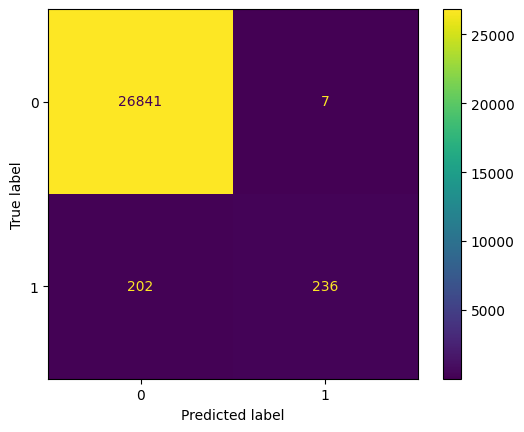

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

Classification report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26848
           1       0.97      0.54      0.69       438

    accuracy                           0.99     27286
   macro avg       0.98      0.77      0.84     27286
weighted avg       0.99      0.99      0.99     27286



Showing ROC AUC Curve for both train and test data

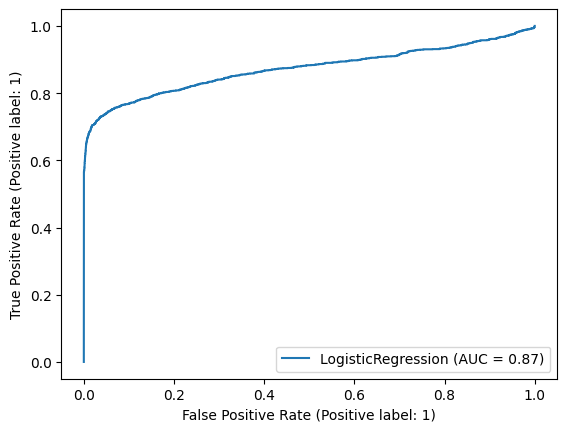

In [92]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, xtrain, ytrain)

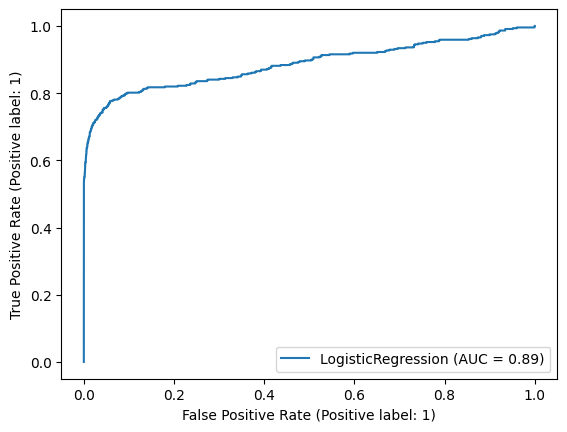

In [93]:
RocCurveDisplay.from_estimator(model, xtest, ytest)

predict results for Out of sample data

In [94]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [95]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Rotational speed [rpm]', 'Torque [Nm]',
                                  'HDF', 'OSF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

Apply pre.transform on out of sample data

In [96]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()


,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__OSF,cat__Type_H,cat__Type_L,cat__Type_M
0,-0.153753,-0.276240,-0.072021,-0.063038,0.0,1.0,0.0
1,1.388744,-1.358313,-0.072021,-0.063038,0.0,1.0,0.0
2,0.033653,-0.311525,-0.072021,-0.063038,0.0,1.0,0.0
3,-0.297912,0.852880,-0.072021,-0.063038,0.0,0.0,1.0
4,-0.038426,0.111895,-0.072021,-0.063038,0.0,0.0,1.0


predict the results and probability

In [97]:
preds = model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
model.classes_

array([0, 1], dtype=int64)

In [99]:
prob = model.predict_proba(xnew_pre)[:, 1]
prob[0:5]

array([0.00321104, 0.00326085, 0.00360302, 0.00972799, 0.00506109])

In [100]:
df_final = xnew[['Product ID']]
df_final

,Product ID
0,L50896
1,L53866
2,L50498
3,M21232
4,M19751
...,...
90949,L51130
90950,L47783
90951,L48097
90952,L48969


In [101]:
df_final['Machine failure_pred']=preds
df_final['MMachine failure_prob']=prob

In [102]:
df_final

,Product ID,Machine failure_pred,MMachine failure_prob
0,L50896,0,0.003211
1,L53866,0,0.003261
2,L50498,0,0.003603
3,M21232,0,0.009728
4,M19751,0,0.005061
...,...,...,...
90949,L51130,0,0.004090
90950,L47783,0,0.002325
90951,L48097,0,0.005204
90952,L48969,0,0.005451


Save above results to csv

In [103]:
df_final.to_csv('results.csv', index=False)

plot how many machines are failure

In [104]:
df_final['Machine failure_pred'].value_counts()

Machine failure_pred
0    90123
1      831
Name: count, dtype: int64

<Axes: xlabel='Machine failure_pred'>

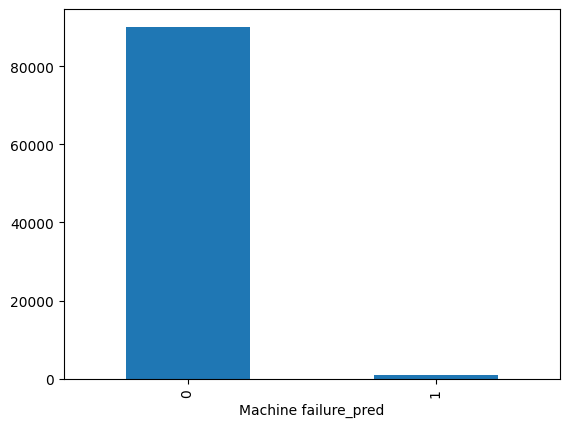

In [105]:
df_final['Machine failure_pred'].value_counts().plot(kind='bar')